# Investigate a Dataset - Titanic Dataset

## Introduction
This report is aiming at analyzing the titanic dataset that are provided on [Kaggle](https://www.kaggle.com/c/titanic/data). The analysis will look into a number of features of the passengers to see what are the factors that might be relevant to the survival of passengers.

## Table of Content
There are a number of parts in this report
1. Data Wraggling
2. Correlation Analysis - Analysing correlations between a number of the features from the data as this might have an effect on our conclusions at the end
3. Descriptive Statistics on Survivors
4. Validation on some well-known rumours
    * Children and elderly are more likely to survived as people tend to take care of them
    * Female are more likely to survived as people tend to let female passengers board the rescue boats first (as illustrated in the Titanic movie)
    * Rich people have a higher surivial rate due to a number of reasons, including priority of boarding rescue boat, bribing the crew and other unknowen reasons
5. Conclusions

## Data Wraggling
Before doing any analysis, we will first need to import all the necessary python packages and the data

In [69]:
# import all necessary packages and functions.
import csv
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

# read in the data by pandas
passengers_data = pd.read_csv('titanic-data.csv')
display(passengers_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


After taking a glimpse of the data, there are a few fields looks pretty meaningless (i.e. `PassengerId`, `Name`, `Ticket`) in the following analysis, so we will first remove them.

In [70]:
passengers_data.drop('PassengerId', axis=1, inplace=True)
passengers_data.drop('Name', axis=1, inplace=True)
passengers_data.drop('Ticket', axis=1, inplace=True)
display(passengers_data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


For easier analysis, we would want to setup the `Survived` and `Sex` fields as categorical data. One interesting part is that we will not categorized `Pclass` as we would like to do a correlation analysis for `Pclass` in the next section.

In [71]:
for col in ['Survived', 'Sex']:
    passengers_data[col] = passengers_data[col].astype('category')
    
for col in ['Pclass', 'SibSp', 'Parch']:
    passengers_data[col] = passengers_data[col].astype('int64')

## Correlation Analysis
In this section, we will make use of correlation matrix to see if there are any correlation between features.

In [72]:
passengers_data.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


In general, we will an |correlation| < 0.3 as weak correlation(which we usually consider as no significant correlation. For 0.3 < |correlation| < 0.7, it is considered as moderate correlaton.

From what we found, there seemed to be a moderate correlation between `# of siblings / spouses aboard the Titanic` and `# of parents / children aboard the Titanic` which can be reasonably explained by the case of family trips.

Also, we identified another stronger correlation, which is a negative corrleation between `Ticket class` and `Passenger fare`. This makes a lot of sense, as the higher the class (i.e. smaller the class number), the higher the fare. This finding actually allow us to take only one of the features into considerations in the later analysis regarding social status or personal wealth.

## Descriptive Statistics on Survivors
Just before we conclude this Titanic tregedy analysis, let's also look at some descriptive statistics on the survivors and the victims.

As we are concerned with age and personal of survivors, we will also run a t-test for means of two independent samples for Age and Fare to see if there are signigicant differences between survivors and victims.

In [112]:
from scipy.stats import ttest_ind_from_stats

means = passengers_data.groupby('Survived').mean()
median = passengers_data.groupby('Survived').median()
sd = passengers_data.groupby('Survived').std()

display(means)
display(median)
display(sd)

print "T-test results for Age:"
print ttest_ind_from_stats(means['Age'][0], sd['Age'][0], len(dead), means['Age'][1], sd['Age'][1], len(survived))

print "T-test results for Fare:"
print ttest_ind_from_stats(means['Fare'][0], sd['Fare'][0], len(dead), means['Fare'][1], sd['Fare'][1], len(survived))

,Pclass,Age,SibSp,Parch,Fare,Fare_class
Survived,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,2.584699
1,1.950292,28.343690,0.473684,0.464912,48.395408,5.283626


,Pclass,Age,SibSp,Parch,Fare,Fare_class
Survived,,,,,,
0,3,28.0,0,0,10.5,2
1,2,28.0,0,0,26.0,3


,Pclass,Age,SibSp,Parch,Fare,Fare_class
Survived,,,,,,
0,0.735805,14.172110,1.288399,0.823166,31.388207,3.206776
1,0.863321,14.950952,0.708688,0.771712,66.596998,6.705250


T-test results for Age:
Ttest_indResult(statistic=2.2888971769109268, pvalue=0.022319082156674223)
T-test results for Fare:
Ttest_indResult(statistic=-7.9391916608710611, pvalue=6.1201893419238888e-15)


From the t-test result, we can concluded that there are a differences in the average age of the survivors and victims. Apparently the older you are, the less chances that you survived from the incident.

On the other hand, there is a very confident differences(P-value of 6.1201893419238888e-15) between the fare paid by survivors and victims. It seems that the general understanding that "rich people leave first" does have at least some grounds.

While we cannot draw much solid conclusions from these descriptive statistics, this provided some insights on the investigations that we are going to look into in the next sections.

## Validation on some well-known rumours
In this part, we will look into three famous rumours or guesses people made on the Titanic tragedy.

### Children and elderly are more likely to survived as people tend to take care of them
To investigate on this issue, we will first needed to define `Children` as age < 12 and `Elderly` as age > 60. First, we will look at how many children and elderly are onboard.

(array([  39.,   64.,  104.,   46.,   30.,    6.,    1.,    0.,    0.]),
 array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 104]),
 <a list of 9 Patch objects>)

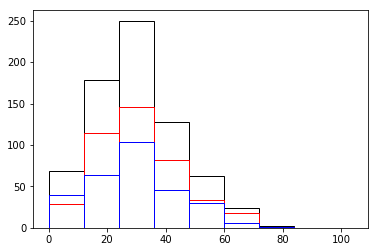

In [74]:
# filter out passengers by survival
survived = passengers_data[passengers_data['Survived']==1]
dead = passengers_data[passengers_data['Survived']==0]

# plotting the age distribution of all, survived and dead passengers on the same graph
plt.figure(1)
plt.hist(passengers_data.Age.dropna(), bins=[0,12,24,36,48,60,72,84,96,104], edgecolor='black', fill=False, stacked=False)
plt.hist(dead.Age.dropna(), bins=[0,12,24,36,48,60,72,84,96,104], edgecolor = "red", stacked=True, fill=False)
plt.hist(survived.Age.dropna(), bins=[0,12,24,36,48,60,72,84,96,104], edgecolor = "blue", stacked=True, fill=False)


From the histogram, we can see that among all ages groups except children with age under 12, are having a lower survival rate than death rate (indicated by a higher blue line than red line). So the myth that both children and elderly are having a higher survival rate is only partially correct.

By assuming that people does give priority to leave Titanic for children and elderly, we can attribute the low surivial rate of elderly by bad health conditions and less likely to withstand the extreme body requirements to survive in the freezing weather.

### Female are more likely to survived as people tend to let female passengers board the rescue boats first (as illustrated in the Titanic movie)

To investigate this issue, we can do a similar analysis as the previous rumour, except we are plotting the geneder distribution instead

([<matplotlib.axis.XTick at 0x1204c3990>,
 <a list of 2 Text xticklabel objects>)

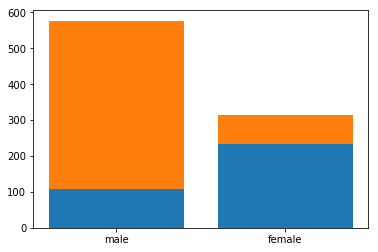

In [75]:
# plotting the gender distribution of survived and dead passengers on the same graph
plt.figure(2)


# for survived passengers
survived_counts = Counter(survived.Sex)
survived_frequencies = survived_counts.values()
x_labels = survived_counts.keys()
bar_x_locations = np.arange(len(survived_frequencies))
plt.bar(bar_x_locations, survived_frequencies, align = 'center')

# for dead passengers
dead_counts = Counter(dead.Sex)
dead_frequencies = dead_counts.values()
plt.bar(bar_x_locations, dead_frequencies, bottom=survived_frequencies, align = 'center')

# adding label for x axis

plt.xticks(bar_x_locations, x_labels)


Obviously, female is having a much higher percentage of survival comparing to male, as shown in the figure. To have a more concrete comparison, we will be calculating the actual survival rate as below:

In [76]:
counts = Counter(passengers_data.Sex)
survival_counts = Counter(survived.Sex)

male_survival_rate = float(survival_counts['male'])/counts['male']
female_survival_rate = float(survival_counts['female'])/counts['female']

print 'Male Survival Rate: {:.1%}'.format(male_survival_rate)
print 'Female Survival Rate: {:.1%}'.format(female_survival_rate)

Male Survival Rate: 18.9%
Female Survival Rate: 74.2%


Putting our findings in a numerical way, female is having a 74.2% of survival rate while male got a survival rate of 18.9% only. While we cannot conclude if this is really due to the female priority for rescue boat, but at least we can be sure that there was a correlation between gender and survival in the Titanic incident.

### Rich people have a higher surivial rate due to a number of reasons

A common perception is that rich people are more likely to survive due a various reason, including priority to rescue ship, bribing the crew etc. This were also a few scenes shown in the classic Titanic movie focusing on the faireness between rich and poor people.

To confirm this, we will do analysis based on the `Ticket class` and `fare`. Firstly, we will calculate the survival rate of different class.

Class 1 Survival Rate: 63.0%
Class 2 Survival Rate: 47.3%
Class 3 Survival Rate: 24.2%


([<matplotlib.axis.XTick at 0x11ff5ea50>,
 <a list of 3 Text xticklabel objects>)

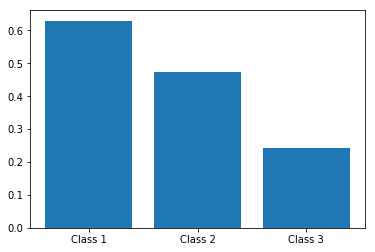

In [77]:
class_counts = Counter(passengers_data.Pclass)
class_survival_counts = Counter(survived.Pclass)

class1_survival_rate = float(class_survival_counts[1])/class_counts[1]
class2_survival_rate = float(class_survival_counts[2])/class_counts[2]
class3_survival_rate = float(class_survival_counts[3])/class_counts[3]

# print class1_survival_rate
print 'Class 1 Survival Rate: {:.1%}'.format(class1_survival_rate)
print 'Class 2 Survival Rate: {:.1%}'.format(class2_survival_rate)
print 'Class 3 Survival Rate: {:.1%}'.format(class3_survival_rate)

plt.figure(3)
frequencies = [class1_survival_rate, class2_survival_rate, class3_survival_rate]
x_labels = ['Class 1', 'Class 2', 'Class 3']
bar_x_locations = np.arange(len(frequencies))
plt.bar(bar_x_locations, frequencies, align = 'center')
plt.xticks(bar_x_locations, x_labels)


While we have concluded that `Ticket Class` and `Fare` are correlated and we might be able to consider only one of them in the following analysis, we can still plot a histogram for the distribution of class for survivals and fatals.

(array([ 67.,  76.,  58.,  28.,   4.,  27.,   6.,  17.,  13.,   7.,   2.,
          5.,   4.,   6.,   2.,   4.,   2.,   0.,   0.,   0.,   0.,   3.,
          3.,   0.,   1.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.]),
 <a list of 52 Patch objects>)

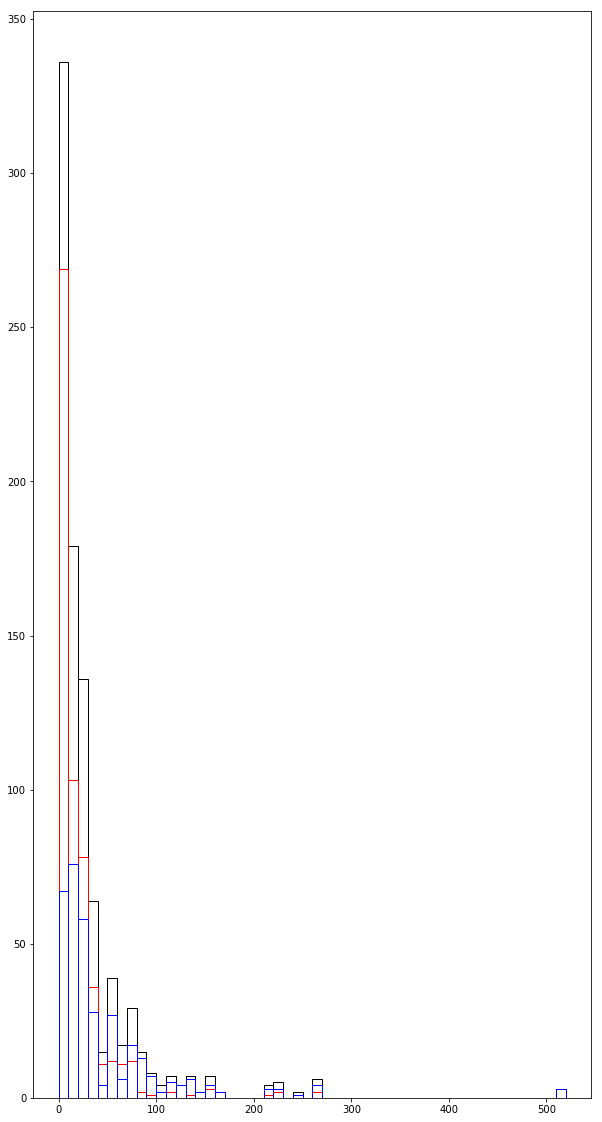

In [113]:
# plotting the class distribution of survived and dead passengers on the same graph
plt.figure(4, figsize=(10,20))
bins = np.arange(min(passengers_data.Fare), max(passengers_data.Fare)+ 10, 10)
plt.hist(passengers_data.Fare, bins=bins, edgecolor='black', fill=False, stacked=False)
plt.hist(dead.Fare, bins=bins, edgecolor = "red", stacked=True, fill=False)
plt.hist(survived.Fare, bins=bins, edgecolor = "blue", stacked=True, fill=False)

From this visualization, we can easily identified that for lowest price groups(0-50), the red line is almost doubling the height of blue line, indicating that the death rate is almost doubling the survival rate. Interestingly, you don't need to pay a lot to signiifcantly increase your survival rate, as long as you are paying more that 50 dollars, you are already enjoying the benefit of paying more, in terms of survival rate.

## Conclusions
In this report, we have looked into a number of assumptions people in general made on the survivors of Titanic tragedy. We did confirmed some of the myth but some are apparently ungrounded.

Children does have a higher survivor rate but elderly does not. While we cannot conclude if elderly are being priorited in the evacuation simply from this dataset, we might also need to consider the weaker healthy conditions of elderly. Even they are evacuated first, they might not be able to survived the extreme cold weather in the middle of the sea.

Gender is another important predictor of survival in the accident. Female have a almost 4 times the survival rate compared to male. It can be reasonably concluded that females are also evacuated first but another contributing factors like females are more likely to be taken care of given the historic background and social structure. One good example of this is illustrated by the scene in the Titanic movie that Jack allowed Rose to stay out of the freezing water by staying on top of a wooden furniture but staying in the water himself.

The most controversial factor would be personal wealth and social status, projects by the fare and ticket classes of passengers. While no one want to believe that welathier personnel are more likely to survived in tregedies and accidents, this is indeed the case in the Titanic tragedy. Although we cannot make any conclusions on why rich people is more likely to survive, we do see as long as you are paying enough($50), you are out of the group with death rate doubling survival rate.

To conclude, we are not able to draw a lot of causual conclusions on survival in shipwreck, I believe that these findings combining with historic and scientific analsis would provide useful insights on shipwreck rescue and 